## [Using virtual enviroments in jupyter on longleaf](https://help.rc.unc.edu/python-packages/#using-virtual-environments-in-a-jupyter-notebook)


I ran that command for `py310` and `base` conda environments

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import sys
sys.path.insert(0, '..')
sys.path.insert(0, '../epsampling/')

import random
import numpy as np
import pandas as pd
import os
import csv
from tqdm import tqdm
 
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True,formatter={'float_kind': '{:f}'.format})
    
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('max_colwidth', None)

from datetime import datetime

DATA_DIR = '/work/users/k/4/k4thryn/Repos/EpSampling/data/'
DT = datetime.today().strftime('%Y%m%d-%H%M%S')

from IPython.display import Audio
def meow():
    display(Audio(filename='../cat_meow2.wav', autoplay=True))

In [19]:
import torch

timestamp = '20241029-123405'
fpath = os.path.join(DATA_DIR,'cached', f'df_modeling_pastweeks_{timestamp}.csv')

df = pd.read_csv(fpath)

## add dummy state variable
df_fips = pd.read_csv('state_fips.csv')
fips_to_st = {k:v for k,v in zip(df_fips.Fips, df_fips.Postal)}
dummies = pd.get_dummies(df['State_fips']).rename(columns=lambda x: 'Is_' + fips_to_st[x]  )
df = pd.concat([df, dummies], axis=1)
df.drop(['State_fips'], inplace=True, axis=1)

df.dropna(inplace=True)

## remove outliers
from scipy import stats
df = df[np.abs(stats.zscore(df.Target)) < 5]

# # # # # # # # # # # # # # # # # # # # #
# # # # # # # # # # # # # # # # # # # # #
df = df.sample(10000)
# # # # # # # # # # # # # # # # # # # # #
# # # # # # # # # # # # # # # # # # # # #

## separate X and y
not_feats = ['Target','Fips', 'State_fips', 'Date',
             'Proj_inc_deaths', 'True_cum_deaths', 'Cum_deaths_tm1',
             'True_inc_deaths', 'Naive_inc_deaths','Target']
feats = [x for x in df.columns if x not in not_feats]
df_X = df[feats]
# .values.astype('float32')
df_y = df['Target']

# .values.astype('float32')

# standardize X
# df_X = (df_X-df_X.mean()) / df_X.std()

_df_X = df_X.loc[:, df_X.columns != 'Naive']
_df_X = (_df_X-_df_X.mean()) / _df_X.std()
_df_X['Naive'] = df_X['Naive']
df_X = _df_X



#     X_arr = df[feat_cols].values.astype('float32')
#     y_arr = df[target_col].values.astype('float32')
#     X = torch.tensor(X_arr)
#     y = torch.tensor(y_arr).reshape(-1, 1)

# Random split
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, 
                                                      random_state=666, shuffle=True)

X_test = torch.tensor( df_test.values.astype('float32'))
y_test = torch.tensor( y_test.values.astype('float32')).reshape(-1, 1)
X_train = torch.tensor( df_train.values.astype('float32'))
y_train = torch.tensor( y_train.values.astype('float32')).reshape(-1, 1)

In [3]:
# df_test['Naive']

In [4]:
# y_test

In [20]:
df_train

,Pop,State_pop,Ratio,TPOP,POPDEN,Metro,Micro,POP1,POP2,POP3,...,Is_TN,Is_TX,Is_UT,Is_VT,Is_VA,Is_WA,Is_WV,Is_WI,Is_WY,Naive
75610,-0.235,-0.686,-0.229,-0.233,-0.212,-1.002,1.099,0.221,-0.746,0.211,...,-0.178,-0.292,-0.094,-0.067,-0.223,-0.111,-0.137,-0.151,-0.095,8.624
114435,-0.201,-0.336,-0.257,-0.198,-0.136,0.998,-0.909,0.161,0.339,0.230,...,-0.178,-0.292,-0.094,-0.067,-0.223,-0.111,-0.137,-0.151,-0.095,3.481
188334,0.108,0.162,-0.037,0.103,0.156,0.998,-0.909,1.414,0.359,-0.914,...,-0.178,-0.292,-0.094,-0.067,-0.223,-0.111,-0.137,-0.151,-0.095,5.222
271047,-0.098,-0.679,0.159,-0.110,-0.242,-1.002,1.099,2.418,1.393,-2.635,...,-0.178,-0.292,10.674,-0.067,-0.223,-0.111,-0.137,-0.151,-0.095,1.556
12429,-0.175,-0.706,-0.036,-0.169,-0.174,-1.002,1.099,0.187,0.833,-0.551,...,-0.178,-0.292,-0.094,-0.067,-0.223,-0.111,-0.137,-0.151,-0.095,3.164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183940,-0.023,0.162,-0.154,-0.022,-0.015,0.998,-0.909,0.097,-0.064,0.091,...,-0.178,-0.292,-0.094,-0.067,-0.223,-0.111,-0.137,-0.151,-0.095,3.259
116067,-0.011,-0.336,0.027,-0.009,0.054,-1.002,1.099,1.293,-0.232,-0.783,...,-0.178,-0.292,-0.094,-0.067,-0.223,-0.111,-0.137,-0.151,-0.095,1.343
181095,0.202,1.310,-0.166,0.203,-0.075,-1.002,1.099,-0.768,0.350,0.841,...,-0.178,-0.292,-0.094,-0.067,-0.223,-0.111,-0.137,-0.151,-0.095,1.122
106431,-0.233,-0.511,-0.278,-0.226,-0.181,0.998,-0.909,0.095,0.231,0.184,...,-0.178,-0.292,-0.094,-0.067,-0.223,-0.111,-0.137,-0.151,-0.095,9.554


In [21]:
import torch.utils.data as data_utils

def get_loader(X, y,  bs=32):
    
#     if isinstance(X, pd.DataFrame):
#     X = X.values.astype('float32')
#     else:
#         X = X.astype('float32')
#     y = y.values.astype('float32')
#     X = torch.tensor(X)
#     y = torch.tensor(y).reshape(-1, 1)
    
    dataset = data_utils.TensorDataset(X, y)
    loader = data_utils.DataLoader(dataset, batch_size=bs, shuffle=True, drop_last=True)
    
    return loader   

In [22]:
import torch.nn as nn
import torch.optim as optim

num_feats = len(feats)
print(num_feats)


import torch
import torch.nn as nn
import torch.nn.functional as F
class EpModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.l0 = nn.Linear(num_feats, 128)
        self.l1 = nn.Linear(128, 64)
        self.l2 = nn.Linear(64, 32)
        self.out = nn.Linear(32, 1)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.l0( x ))
        x = self.relu(self.l1( x ))
        x = self.relu(self.l2( x ))
#         x = self.relu(self.out( x ))
        x = self.out( x )
        
        
        return x

115


  0%|          | 0/100 [00:00<?, ?it/s]

429.7286682128906 347.89080810546875
70.15271759033203 59.11619567871094
68.32462310791016 59.764434814453125
65.78218841552734 61.37718963623047
63.385459899902344 63.427345275878906
58.79307556152344 65.45928192138672
53.9105224609375 69.55192565917969
48.5062141418457 76.48306274414062
42.908634185791016 85.11296844482422
38.698387145996094 88.21636199951172
MSE: 58.59
RMSE: 7.65


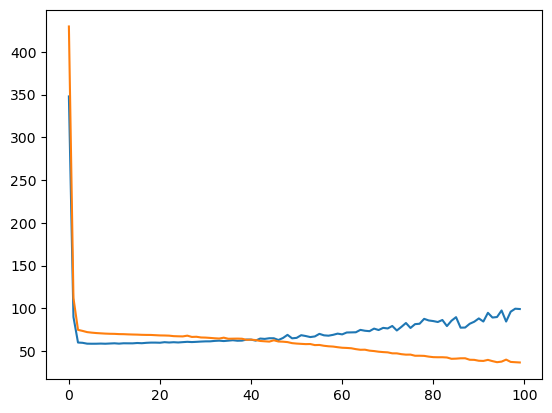

In [23]:
import copy
 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm
n_epochs = 100  
bs = 512
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
test_history = []
train_history = []

model = EpModel()
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in tqdm(range(n_epochs)):
    model.train()
    
    loader = get_loader(X_train, y_train, bs=bs)
    for X_batch, y_batch in loader:
    
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    model.eval()
    

    y_pred = model(X_train)
    train_mse = float(loss_fn(y_pred, y_train))
    train_history.append(train_mse) 
    
    y_pred = model(X_test)
    test_mse = float(loss_fn(y_pred, y_test))
    test_history.append(test_mse)
    
    
    if test_mse < best_mse:
        best_mse = test_mse
        best_weights = copy.deepcopy(model.state_dict()) 
        
    if epoch % 10==0: print(train_mse, test_mse)
            
# model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(test_history)
plt.plot(train_history)
# plt.yscale('log')
plt.show()            


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
def get_performance(model_names, model_preds, y_test):
    
    metrics_dict = {'MAE': mean_absolute_error,
                    'MedAE': median_absolute_error,
                    'MSE': mean_squared_error,
                    'RMSE': mean_squared_error,
                    'r2': r2_score,
                   }

    model_res_dict = {model:{} for model in model_names}
    
    for model,pred in zip(model_names, model_preds):
        for metric, func in metrics_dict.items():
            if metric=='RMSE':
                model_res_dict[model][metric] = func(y_test, pred, squared=False)
            else:
                model_res_dict[model][metric] = func(y_test, pred)
            
    return model_res_dict


metrics_dict = get_performance(['MLP','Naive'], 
                               [model(X_test).detach().numpy(), df_test['Naive'].values], 
                               y_test)
display(metrics_dict)

metrics_dict = get_performance(['MLP','Naive'], 
                               [model(X_train).detach().numpy(), df_train['Naive'].values], 
                               y_train)
display(metrics_dict)


{'MLP': {'MAE': 4.9082017,
  'MedAE': 2.3774266,
  'MSE': 99.203156,
  'RMSE': 9.960078,
  'r2': 0.6203679099728538},
 'Naive': {'MAE': 3.699807102455956,
  'MedAE': 1.798351844602034,
  'MSE': 59.614086524504806,
  'RMSE': 7.721015899770237,
  'r2': 0.7718679318678543}}

{'MLP': {'MAE': 3.265312,
  'MedAE': 1.8400893,
  'MSE': 36.67691,
  'RMSE': 6.0561466,
  'r2': 0.8952505951547168},
 'Naive': {'MAE': 3.765331180428061,
  'MedAE': 1.8556009876412158,
  'MSE': 74.09662575929796,
  'RMSE': 8.607939693056519,
  'r2': 0.7883797494358675}}

In [25]:
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# np.set_printoptions(suppress=True)

In [16]:

# def line_plot(df, x_col, y_col, title=None):

#     import matplotlib.pyplot as plt
#     import seaborn as sns

#     sns.regplot(data=df, x=x_col, y=y_col, 
#                 scatter_kws={'s':10, 'alpha':0.5}, 
#                 line_kws={'color':'k','linewidth':0.5},logx=False)
    
#     if title is not None:
#         plt.title(title) 

#     plt.show()
    
    
    


# df_test['NN'] = y_pred.detach().numpy()
# line_plot(df_test, 'Target', 'NN')

In [17]:
# import torch.utils.data as data_utils

# def get_df_loader(df, feat_cols, target_col='Target', bs=32):
    
#     X_arr = df[feat_cols].values.astype('float32')
#     y_arr = df[target_col].values.astype('float32')
#     X = torch.tensor(X_arr)
#     y = torch.tensor(y_arr).reshape(-1, 1)
    
#     dataset = data_utils.TensorDataset(X, y)
#     loader = data_utils.DataLoader(dataset, batch_size=bs, shuffle=True, drop_last=True)
    
#     return loader   


# import torch.utils.data as data_utils

# def get_loader(X, feat_cols, target_col='Target', bs=32):
    
#     X_arr = df[feat_cols].values.astype('float32')
#     y_arr = df[target_col].values.astype('float32')
#     X = torch.tensor(X_arr)
#     y = torch.tensor(y_arr).reshape(-1, 1)
    
#     dataset = data_utils.TensorDataset(X, y)
#     loader = data_utils.DataLoader(dataset, batch_size=bs, shuffle=True, drop_last=True)
    
#     return loader   


In [18]:
# import copy
 
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import torch
# import torch.nn as nn
# import torch.optim as optim
# # from tqdm.notebook import tqdm

# n_epochs = 100  
# bs = 512

# batch_start = torch.arange(0, len(X_train), bs)
 
# # Hold the best model
# best_mse = np.inf   # init to infinity
# best_weights = None
# history = []
 
# for epoch in range(n_epochs):
#     model.train()
#     with tqdm(batch_start) as bar:
# #         bar.set_description(f"Epoch {epoch}")
#         for start in bar:
#             # take a batch
#             X_batch = X_train[start:start+bs]
#             y_batch = y_train[start:start+bs]
#             # forward pass
#             y_pred = model(X_batch)
#             loss = loss_fn(y_pred, y_batch)
#             # backward pass
#             optimizer.zero_grad()
#             loss.backward()
#             # update weights
#             optimizer.step()
#             # print progress
#             bar.set_postfix(mse=float(loss))
#     # evaluate accuracy at end of each epoch
#     model.eval()
#     y_pred = model(X_test)
#     mse = loss_fn(y_pred, y_test)
#     mse = float(mse)
#     history.append(mse)
#     if mse < best_mse:
#         best_mse = mse
#         best_weights = copy.deepcopy(model.state_dict())

# # model.load_state_dict(best_weights)
# print("MSE: %.2f" % best_mse)
# print("RMSE: %.2f" % np.sqrt(best_mse))
# plt.plot(history)
# # plt.yscale('log')
plt.show()